# 心脏病数据集
地址：https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

任务：基于scikit-learn、TensorFlow或PyTorch软件包，对Kaggle平台上的心脏病数据集进行分类，并可视化。

## 所用库



In [28]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题
warnings.filterwarnings("ignore")

# 可视化数据集
使用pandas库读取文件,检查文件读取是否正确

In [29]:
df = pd.read_csv('C:/PyCharm/scientificProject/data1/heart.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


获取数据框的基本信息，例如数据类型、列数、行数、值的数量、缺失值的数量

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


获得数据框df中每列缺失值的总数。

In [31]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

使用Python的matplotlib与seaborn库来可视化心脏病数据集中不同特征的分布情况。
首先将需要可视化的特征存储在一个名为"cols"的列表中。接下来，您使用一个for循环来迭代每个特征并针对每个特征创建两个子图，一个子图用于显示该特征的直方图，另一个子图用于显示该特征的箱线图。

在直方图子图中，使用了seaborn库的histplot函数，并为其传递了以下参数：数据集（即df）、要绘制的特征（即column）以及kde=True，它指示函数同时绘制内核密度估计曲线。
在箱线图子图中，使用了seaborn库的boxplot函数，并为其传递了x=df[column]作为数据。
最后，使用plt.show()函数来显示每个子图。

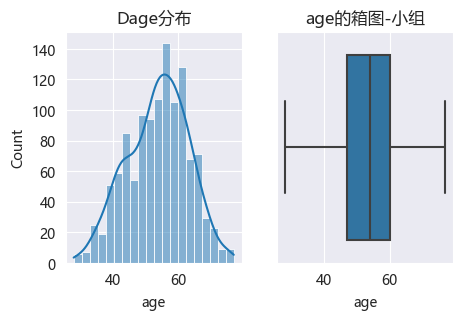

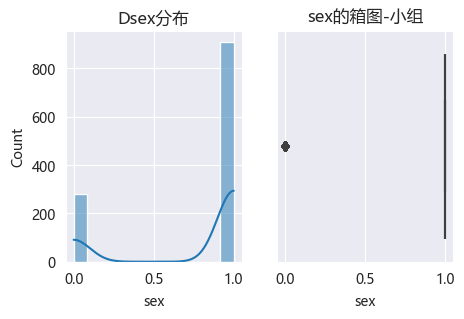

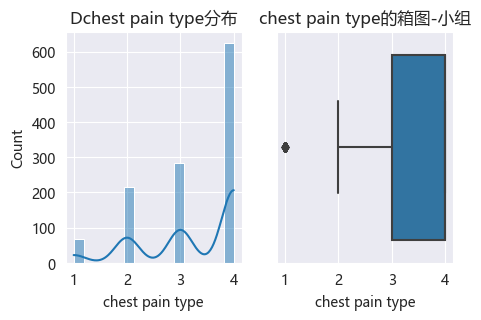

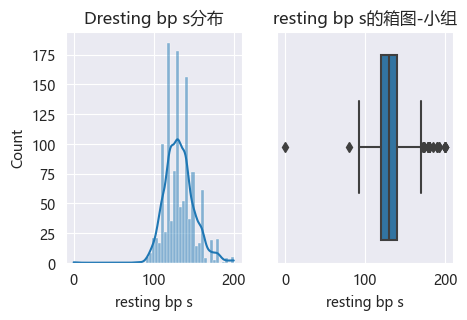

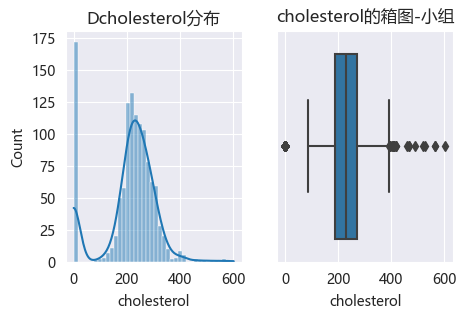

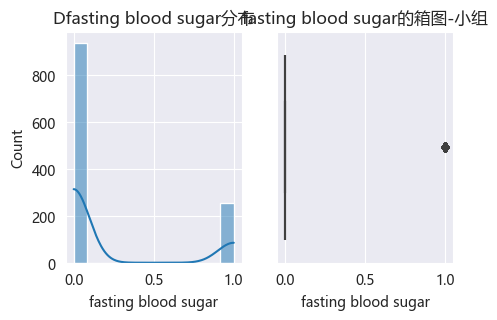

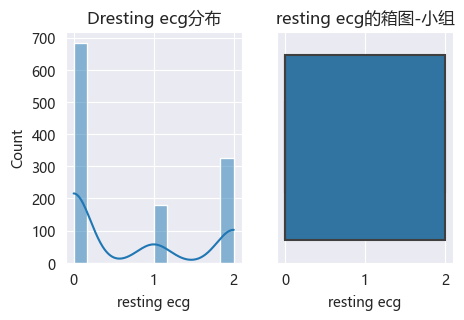

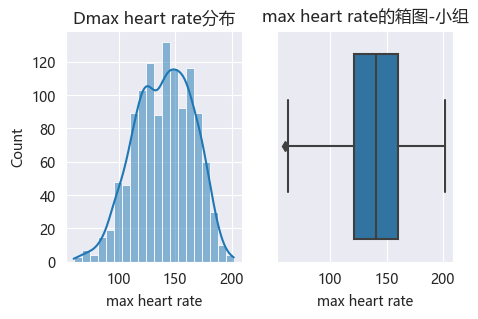

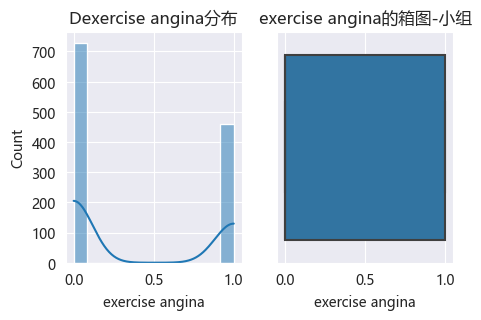

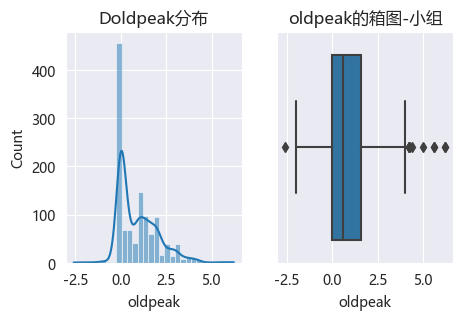

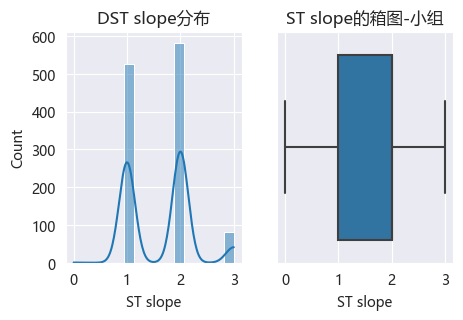

In [32]:
cols = ['age', 'sex', 'chest pain type', 'resting bp s',
        'cholesterol', 'fasting blood sugar', 'resting ecg', 
       'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


for i, column in enumerate(cols, 1):
    plt.figure(figsize=(5, 3))
    
    # Create histogram on the left side
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'D{column}分布')
    
    # Create boxplot on the right side
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'{column}的箱图-小组')
    
    plt.show()

Text(0.5, 1.0, '散点分布')

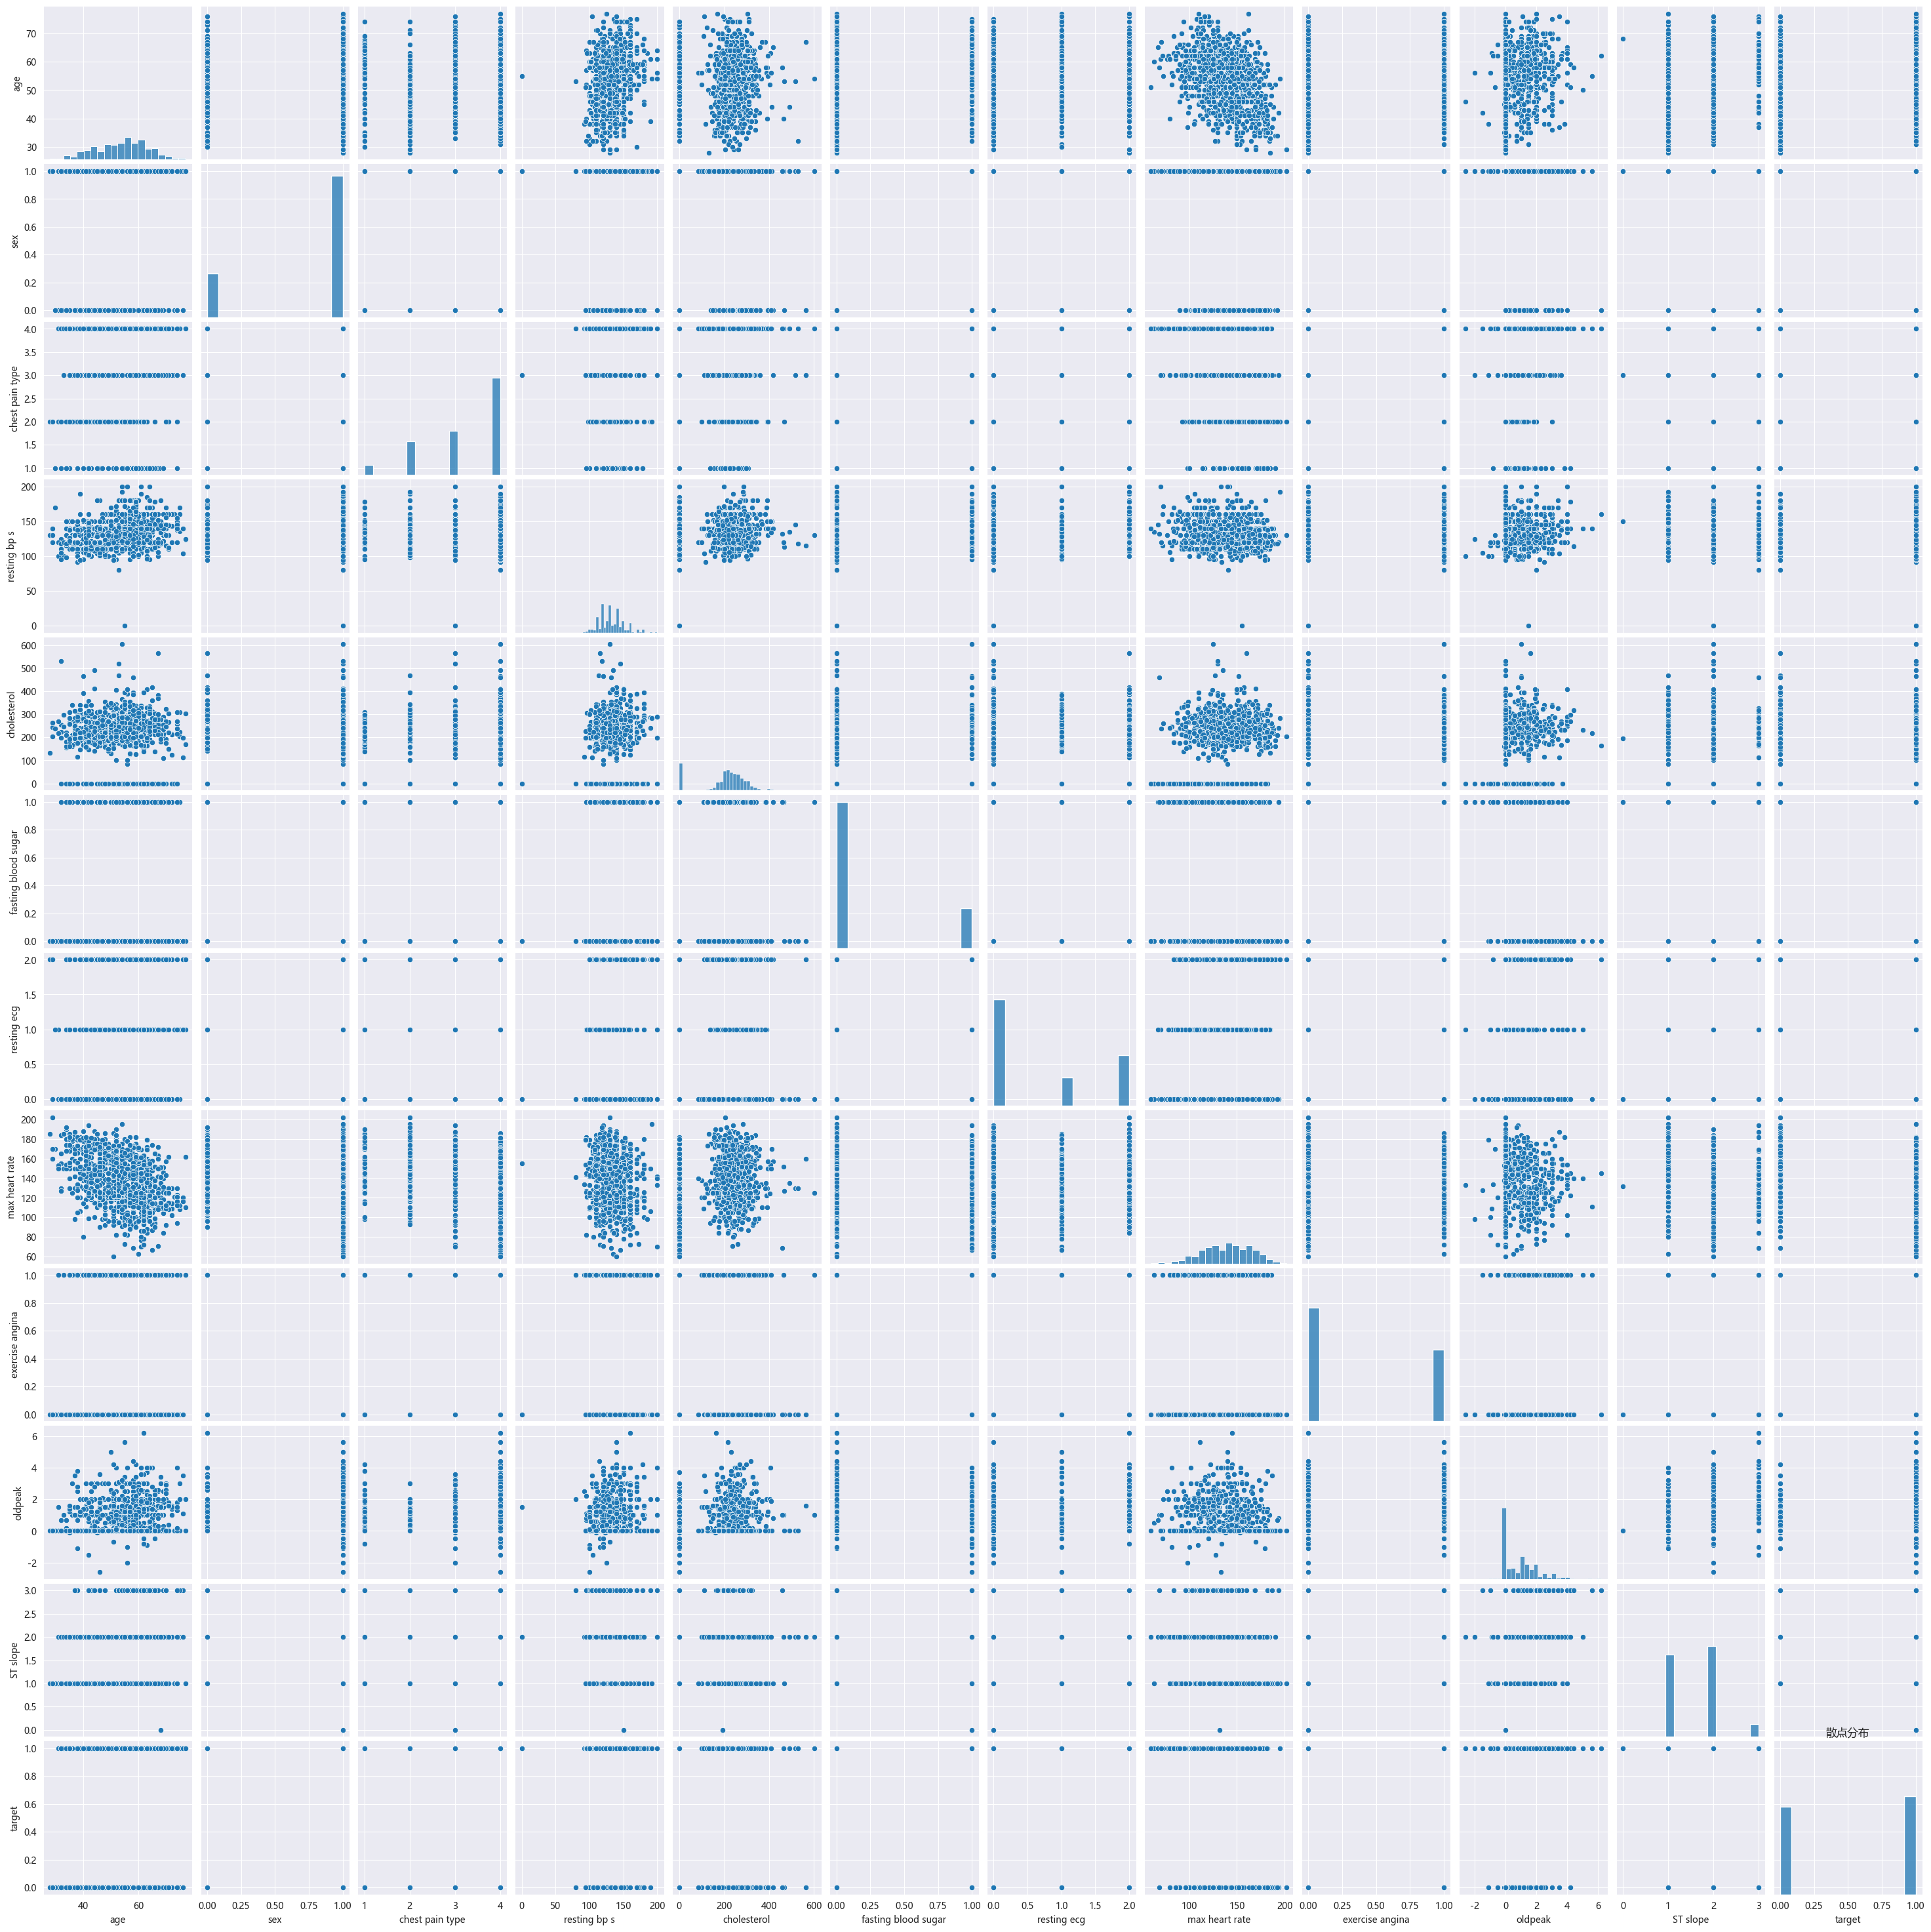

In [33]:
sns.pairplot(df)
plt.title('散点分布') # 年龄分布

使用了seaborn库来绘制了一个包含五个子图的图表，每个子图都是基于不同的特征进行了可视化。
分别绘制了性别（sex）与胸痛类型（chest pain type）、空腹血糖水平（fasting blood sugar）、静息心电图（resting ecg）、
ST段斜率（ST slope）、心脏病患者标签（target）之间的关系。
通过这些可视化图表，可以更直观地了解不同特征之间的关系，以及它们与性别和心脏病发作的关联情况。

<Axes: xlabel='sex', ylabel='count'>

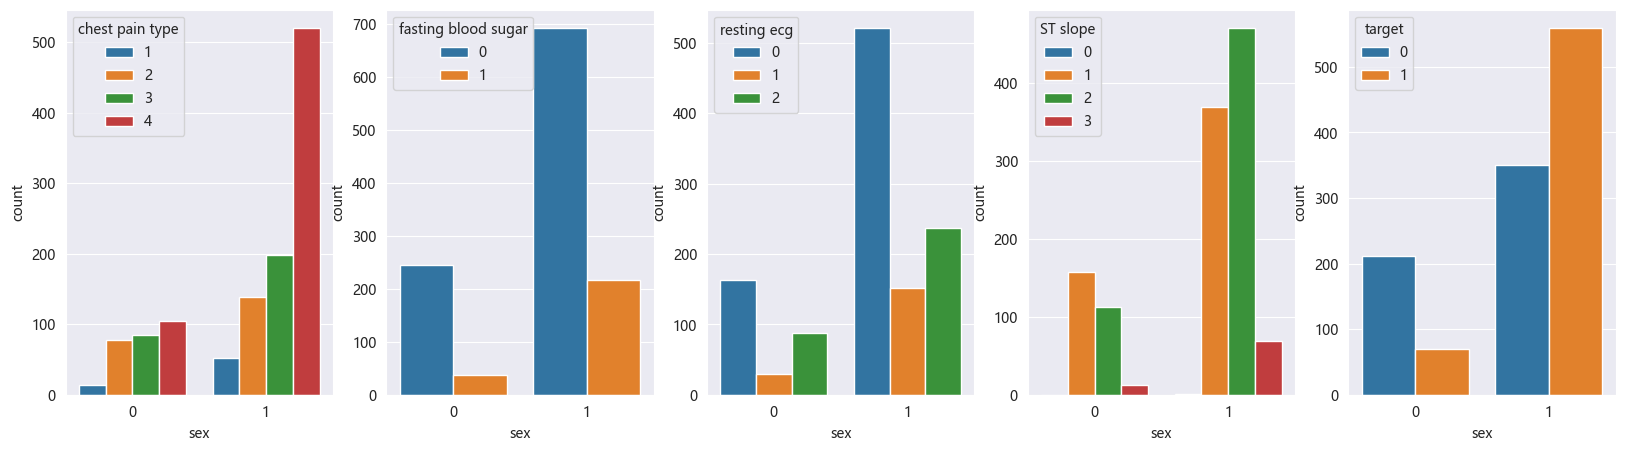

In [34]:
fig,axes=plt.subplots(1,5,figsize=(20,5))
sns.countplot(data=df,x='sex',hue='chest pain type',ax=axes[0])
sns.countplot(data=df,x='sex',hue='fasting blood sugar',ax=axes[1])
sns.countplot(data=df,x='sex',hue='resting ecg',ax=axes[2])
sns.countplot(data=df,x='sex',hue='ST slope',ax=axes[3])
sns.countplot(data=df,x='sex',hue='target',ax=axes[4])

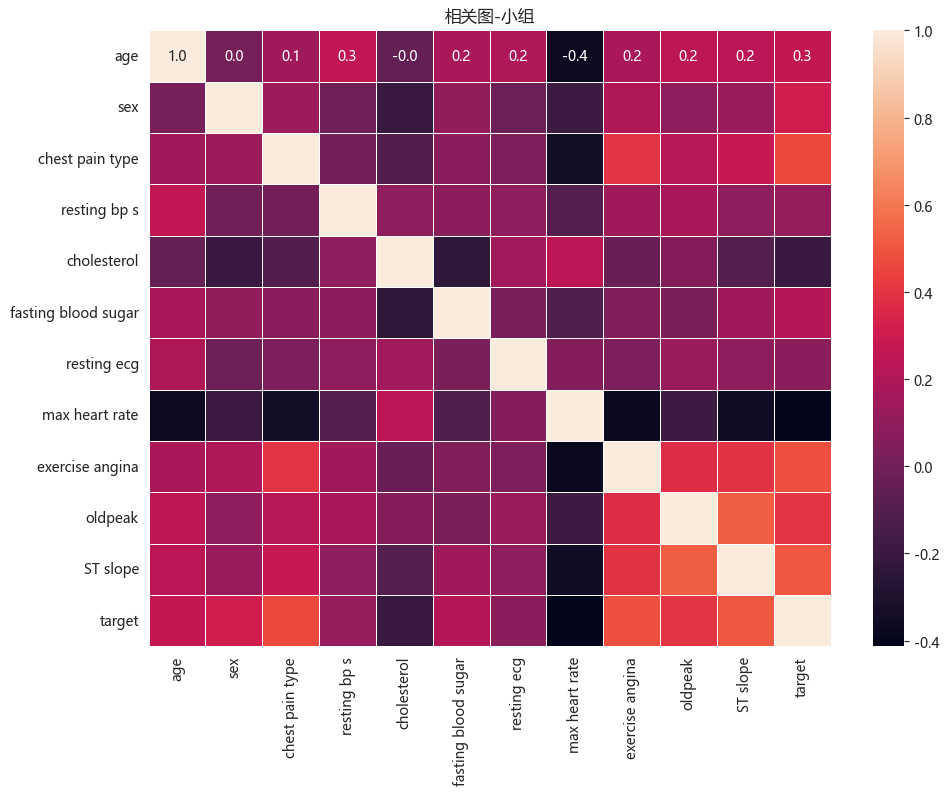

In [35]:
plt.figure(figsize=[11, 8])
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')
plt.title('相关图-小组')
plt.show()

## 决策树分类法(DecisionTreeClassifier) - 郑婉晴
+ 创建一个决策树分类器的实例命名为dt_clf，然后使用训练集的特征矩阵X_train和目标变量y_train来训练决策树分类器。
+ 使用训练好的决策树分类器对测试集的特征矩阵X_test进行预测，并将预测结果存储在变量predictions中。
+ 使用函数recall_score(y_test, predictions, average='weighted')计算召回率（Recall），
其中y_test是测试集的真实目标变量，predictions是模型的预测结果，average='weighted'`表示使用加权平均来计算召回率。
+ 使用函数accuracy_score(y_test, predictions)计算准确率。
+ 使用函数precision_score(y_test, predictions, average='weighted', zero_division=1)计算了精确度（Precision）,zero_division=1表示当分母为零时返回值为1。
+ 使用了格式化字符串（f-string）来打印召回率、准确率和精确度的结果。

### 训练集和测试集
+ 从数据框（DataFrame）df中删除了名为'target'的列，并将剩余的列赋值给变量X。axis=1表示按列进行操作。
+ 从数据框df中提取了名为'target'的列，并将其赋值给变量y。
+ 使用train_test_split函数将数据集划分为训练集和测试集。其中，X是特征矩阵，y是目标变量。
test_size=0.3表示测试集占总数据集的比例为30%。random_state=42是一个随机种子，用于确保每次运行代码时都能得到相同的划分结果。

In [36]:
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
predictions = dt_clf.predict(X_test)
recall = recall_score(y_test, predictions, average='weighted')  
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
#输出
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Recall: 0.8711484593837535
Accuracy: 0.8711484593837535
Precision: 0.8740289151679091


+ 使用训练好的决策树分类器对测试集的特征矩阵X_test进行预测，并将预测结果存储在变量y_dt中。
+ 使用函数print(classification_report(y_dt, y_test, digits=4))打印分类报告，并且保留四位小数。
+ 使用Seaborn库绘制混淆矩阵的热力图。再使用confusion_matrix(y_dt, y_test)计算预测结果和真实目标变量之间的混淆矩阵，用annot=True在热力图上显示数值。
+ 显示热力图。

              precision    recall  f1-score   support

           0     0.8896    0.8253    0.8562       166
           1     0.8571    0.9110    0.8832       191

    accuracy                         0.8711       357
   macro avg     0.8734    0.8681    0.8697       357
weighted avg     0.8722    0.8711    0.8707       357



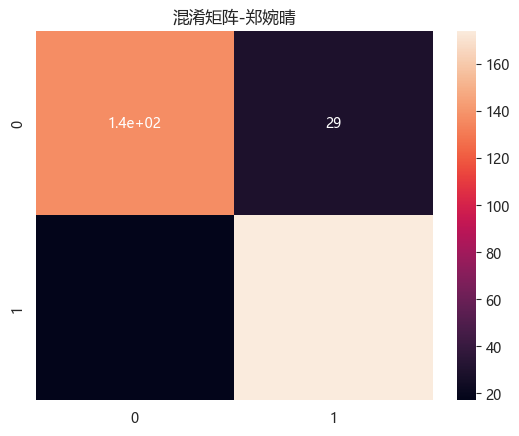

In [38]:
y_dt = dt_clf.predict(X_test)
print(classification_report(y_dt, y_test, digits=4))
sns.heatmap(confusion_matrix(y_dt, y_test), annot=True)
plt.title("混淆矩阵-郑婉晴")
plt.show()

## 随机森林-李博

In [39]:
x_lb=df.drop('target',axis=1)
y_lb=df['target']

In [40]:
# 拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x_lb,y_lb,test_size=0.3,random_state=42)

In [41]:
# 构建模型
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [42]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [43]:
accuracy

0.927170868347339

## 网格搜索交叉验证来提高随机森林的准确率-周祥琪

In [44]:
X = df.iloc[:, :-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
rf_clf = RandomForestClassifier()

# 定义用于调整的超参数网格
param_grid = {
    'n_estimators': [50, 100, 125, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 执行网格搜索交叉验证

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# 使网格搜索适合数据
grid_search.fit(X_train, y_train)

# 打印找到的最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 获取最佳
best_rf_model = grid_search.best_estimator_

# 评估测试集上的最佳模型
test_accuracy = best_rf_model.score(X_test, y_test)
print("在测试集上的准确率:", test_accuracy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
最佳参数组合: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
在测试集上的准确率: 0.9355742296918768


              precision    recall  f1-score   support

           0     0.9091    0.9032    0.9061       155
           1     0.9261    0.9307    0.9284       202

    accuracy                         0.9188       357
   macro avg     0.9176    0.9170    0.9173       357
weighted avg     0.9187    0.9188    0.9187       357



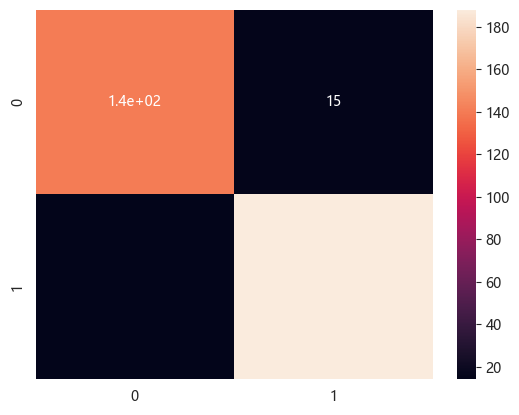

In [46]:
rf_clf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

rf_clf.fit(X_train, y_train)
#使用训练好的模型对测试集 X_test 进行预测
y_rf = rf_clf.predict(X_test)

print(classification_report(y_rf, y_test, digits=4))
# 绘制混淆矩阵
sns.heatmap(confusion_matrix(y_rf, y_test), annot=True)
plt.show()

# 逻辑回归模型分类法-张燕婷

In [47]:
X = df.iloc[:, :-1]
y = df['target']

Recall: 0.8403361344537815
Accuracy: 0.8403361344537815
Precision: 0.8404719409322337
              precision    recall  f1-score   support

           0     0.8129    0.8182    0.8155       154
           1     0.8614    0.8571    0.8593       203

    accuracy                         0.8403       357
   macro avg     0.8371    0.8377    0.8374       357
weighted avg     0.8405    0.8403    0.8404       357



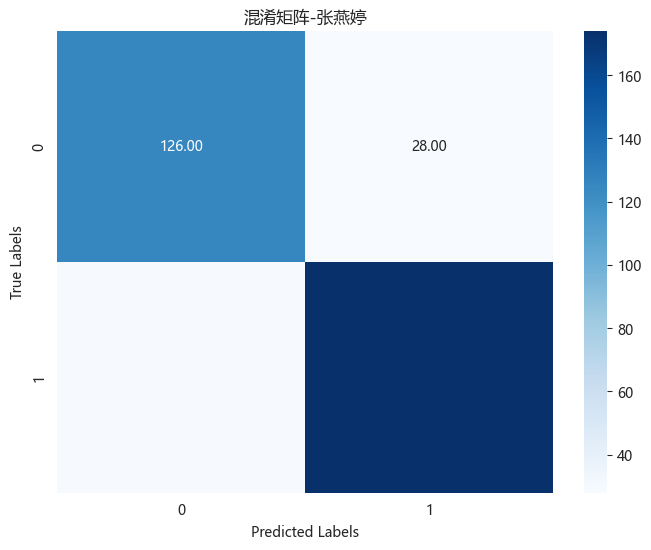

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
recall = recall_score(y_test, predictions, average='weighted')  
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 


print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

# 输出分类报告
print(classification_report(y_test, predictions, digits=4))

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.rcParams['font.family'] = 'Microsoft YaHei'
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('混淆矩阵-张燕婷')
plt.show()

## XGBoost分类方法-王灿
+ 将数据集划分为特征矩阵X和目标变量y
+ 使用train_test_split函数将数据集划分为训练集和测试集
+ 使用XGBClassifier创建一个分类器对象x，并使用训练集对其进行拟合
+ 使用该模型对测试集进行预测，并将预测结果存储在predictions变量中
+ 计算召回率、准确率和精确度等评估指标，并将它们打印出来
+ 创建了一个新的XGBClassifier对象xgb_clf，并设置了不同的参数
+ 使用这个新模型对训练集进行拟合，并对测试集进行预测，将预测结果存储在y_xgb变量中
+ 使用classification_report函数打印出详细的分类报告，并使用heatmap绘制混淆矩阵。

In [49]:
X = df.iloc[:, :-1]
y = df['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
x = XGBClassifier()
x.fit(X_train, y_train)
predictions = x.predict(X_test)
recall = recall_score(y_test, predictions, average='weighted')
accuracy = accuracy_score (y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print("-" * 50)

Recall: 0.9103641456582633
Accuracy: 0.9103641456582633
Precision: 0.9102926967888604
--------------------------------------------------


              precision    recall  f1-score   support

           0     0.9156    0.9216    0.9186       153
           1     0.9409    0.9363    0.9386       204

    accuracy                         0.9300       357
   macro avg     0.9282    0.9289    0.9286       357
weighted avg     0.9300    0.9300    0.9300       357



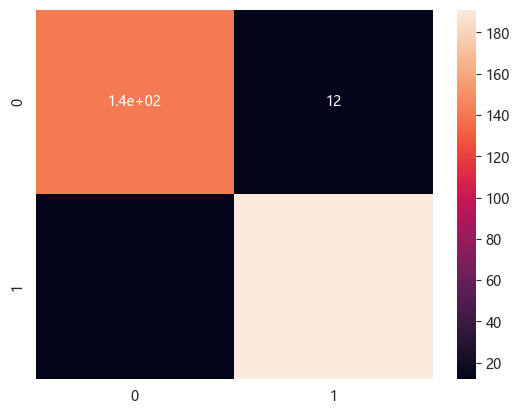

In [52]:
xgb_clf = XGBClassifier(colsample_bytree=1.0, gamma=0.1, learning_rate=0.1,
                            max_depth=5, n_estimators=200, subsample=0.8)
xgb_clf.fit(X_train, y_train)
y_xgb = xgb_clf.predict(X_test)
print(classification_report(y_xgb, y_test, digits=4))
sns.heatmap(confusion_matrix(y_xgb, y_test), annot=True)
plt.show()

## XGBoost分类器+网格搜索（Grid Search）-侯林峰

In [53]:

xgbc=XGBClassifier(random_state=42) # important parameter for consistency
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[136  14]
 [ 18 189]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       150
           1       0.93      0.91      0.92       207

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357

0.9103641456582633


In [54]:
#Grid Search for XGBoost
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[200,400,600],'gamma':[0.01,0.1,1]}
grid_search=GridSearchCV(estimator=xgbc,param_grid=params,cv=5,scoring='accuracy')
grid_search.fit(X_train, y_train)
y_pred=grid_search.predict(X_test)
print("Best parameters:",grid_search.best_params_)
print("Best cross-validation score:",grid_search.best_score_)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

Best parameters: {'gamma': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.9015871870716399
[[140  12]
 [ 14 191]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       152
           1       0.94      0.93      0.94       205

    accuracy                           0.93       357
   macro avg       0.92      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357

0.927170868347339
